# Linear Regression Template








What the project is about

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# Read the CSV file and look at the head of the Dataframe
df = pd.read_csv('housing.csv')
df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploriatory Data Analysis

df.info() will tell you total numer of colums, total number of entries. It Also gives hints on what type of objects are in the data Frame

My Question: what is the significance of know what the data types are?

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


df.describe() use this to get a quick account  of some statistical information

In [65]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


df.columns Use this to refrence what the column names are

In [67]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

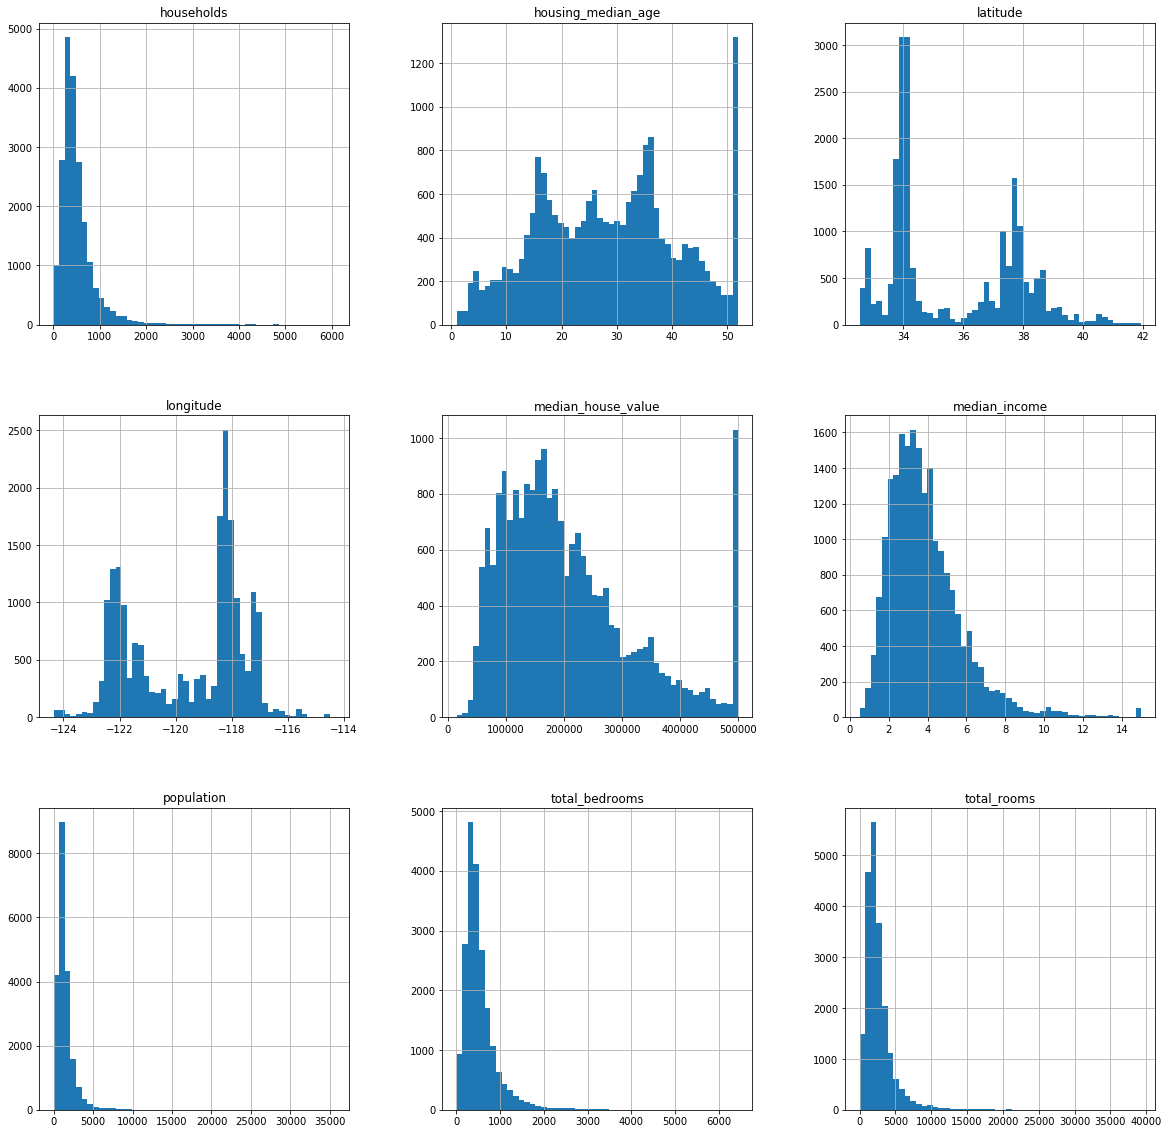

In [68]:
df.hist(bins=50, figsize=(20,20))
plt.show()

Fillling all NAN values of Dataframe with Mean value

In [69]:

df['total_bedrooms'][df['total_bedrooms'].isnull()] = np.mean(df['total_bedrooms'])
df.loc[290]

C:\Users\sanca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms         537.871
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
Name: 290, dtype: object

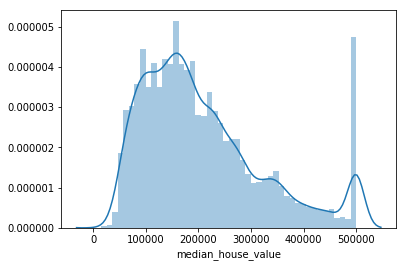

In [8]:
sns.distplot(df['median_house_value'])#you want to check out the distrubtion of your target column
# or what your trying to predict I.E Price of house

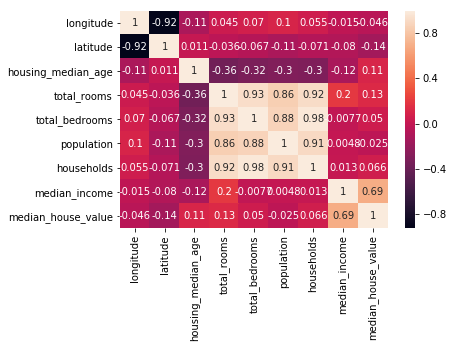

In [9]:
df.corr() # shows the correclation of each of the columns
sns.heatmap(df.corr(),annot=True)

# Training Dataset
Training a linear regression Model

1.The first thing you need to do is split our data into an X-ray that contains the features to train on and a y array with the target variable.(Ex. Price)

2.The next step is to do a train test split on The data.

In [38]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [39]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]
# These are the features

In [40]:
#y is going to be the traget variable
y = df['median_house_value']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#train_test_split #shift tab copy paste X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# set test size to .4 and set randome state to 101
# test size is the percantage that you  want to be allocated to your test size
# random_state insures a random split in the data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [44]:
from sklearn.linear_model import LinearRegression 

In [45]:
lm = LinearRegression() # creates a linear regression object

In [46]:
#lm. and then hit tab to view all the available methods
# what you want to do first is use fit in order to train or fit your model
# on the training data
# next step is to evaluate our model by checking out its coeffients
# and seeing how we can interpret them (print the intercepts)
# the coreficnets are going to relate to each feature in the data set
# then create a dataframe with the coeffiencts in order to orginaze this a little better
#

In [47]:
lm.fit(X_train, y_train) #Only on traing Data

ValueError: could not convert string to float: 'NEAR OCEAN'

In [25]:
print(lm.intercept_)

-2640159.7968525263


In [26]:
lm.coef_ #Each of the coeffiecntes relates to the columns in x train

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [27]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [28]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [29]:
cdf # here we have a coeffiant for each feature

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions

In [31]:
predictions = lm.predict(X_test) # you want to pass in feateus the model has never seen
# before

In [33]:
predictions #these are the predictive prices of the house(or any feature you are trying to predict)

array([1260960.70567627,  827588.75560334, 1742421.2425434 , ...,
        372191.40626923, 1365217.15140897, 1914519.5417887 ])

In [34]:
y_test # we know that y_test contains the carrent prices of the house

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

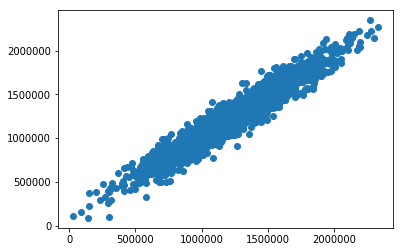

In [35]:
# we wnat to know how off are the prection from the true values!!!
# a scatter plot is a quick way you can visualize the comparison between
# your prdection and the real data, if its  straigh line is accurate
plt.scatter(y_test,predictions)

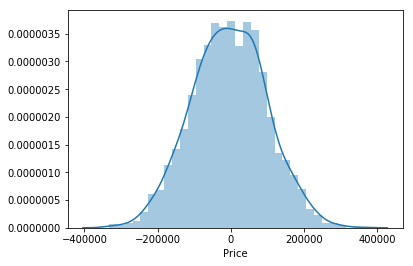

In [36]:
# next lets create a histogram of the distrubution of our residuals
sns.distplot(y_test-predictions)
# the residuals look to be normally distrubtued, that is a good sign
# it typically means that your model was the correct choice for the data


# Regression evaulation metrics
Mean Absolute Error

Mean squared Error

Root Mean Squared Error


Loss Functions, we want to minimize them

In [37]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914948

In [40]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209064

In [41]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.8292229094